# Machine Learning Models for Regression 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = 'DATA/OSA_DB_cleaned.xlsx'
# file_path = 'DATA/OSA_DB_cleaned_without_imputation.xlsx'

df = pd.read_excel(file_path)
df_reg = df.drop(columns=['Patient', 'Weight', 'Height'])
df_reg.head()

# Convert Gender into categorical
df_reg['Gender'] = df_reg['Gender'].astype('category')

df_reg.dtypes

Gender      category
AHI          float64
Age            int64
Cervical     float64
BMI          float64
dtype: object

In [2]:
# # Load the Excel file

# file_path = 'DATA/Copilot_OSA_DB_UPM.xlsx'
# # file_path = 'DATA/OSA_DB_cleaned.xlsx'
# # file_path = 'DATA/OSA_DB_cleaned_without_imputation.xlsx'
# df = pd.read_excel(file_path)

# # Add BMI to the columns
# df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# # Drop Patient, Weight, and Height columns
# df_reg = df.drop(columns=['Patient', 'Weight', 'Height'])

# # Convert Gender into categorical
# df_reg['Gender'] = df_reg['Gender'].astype('category')

# # Rename the column IAH to AHI
# df_reg.rename(columns={'IAH': 'AHI'}, inplace=True)

# # Convert 'Gender' column: 'mujer' to 1 and 'hombre' to 0
# df_reg['Gender'] = df_reg['Gender'].map({'mujer': 0, 'hombre': 1})

# df_reg.dtypes

## To get started: get more intuition in the complete pipeline that needs to be executed: 
### 1) Data splitting
### 2) Feature normalization 
### 3) Training the models via nested Cross-Validation to perform hyperparameter tuning and model selection 

### Data splitting

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define the features and target variable
X = df_reg.drop(columns=['AHI'])
y = df_reg['AHI']

# Split the data into training and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print shapes 
print(X_train_val.shape)
print(X_test.shape)
print(y_train_val.shape)
print(y_test.shape)

(519, 4)
(130, 4)
(519,)
(130,)


### Feature normalization

In [4]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit the scaler on the training data and transform the training data
X_train_val_min_max_scaled = min_max_scaler.fit_transform(X_train_val)

# Transform the test data using the same scaler
X_test_min_max_scaled = min_max_scaler.transform(X_test)

# Convert the scaled data back to DataFrame for better readability
X_train_val_min_max_scaled = pd.DataFrame(X_train_val_min_max_scaled, columns=X_train_val.columns)
X_test_min_max_scaled = pd.DataFrame(X_test_min_max_scaled, columns=X_test.columns)

# Print the first few rows of the scaled training data
print(X_train_val_min_max_scaled.head())

# Print the first few rows of the scaled test data
print(X_test_min_max_scaled.head())

   Gender       Age  Cervical       BMI
0     1.0  0.462687  0.608696  0.515271
1     1.0  0.731343  0.739130  0.273105
2     1.0  0.417910  0.478261  0.214654
3     1.0  0.179104  0.695652  0.501273
4     1.0  0.805970  0.347826  0.118407
   Gender       Age  Cervical       BMI
0     1.0  0.343284  0.608696  0.365626
1     0.0  0.447761  0.565217  0.585465
2     1.0  0.268657  0.521739  0.276412
3     1.0  0.582090  0.521739  0.241892
4     0.0  0.447761  0.347826  0.252492


## Training multiple linear regression model to get more intuition for the implementation of nested CV

In [39]:
# Create and train the model
model = LinearRegression(fit_intercept=True)

model.fit(X_train_val_min_max_scaled, y_train_val)

# Make predictions
y_pred = model.predict(X_test_min_max_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test - y_pred))

print(f'R-squared: {r2}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')


R-squared: 0.14446076879930725
Mean Squared Error: 301.28643697292165
Root Mean Squared Error: 17.35760458625906
Mean Absolute Error: 13.142975190744238


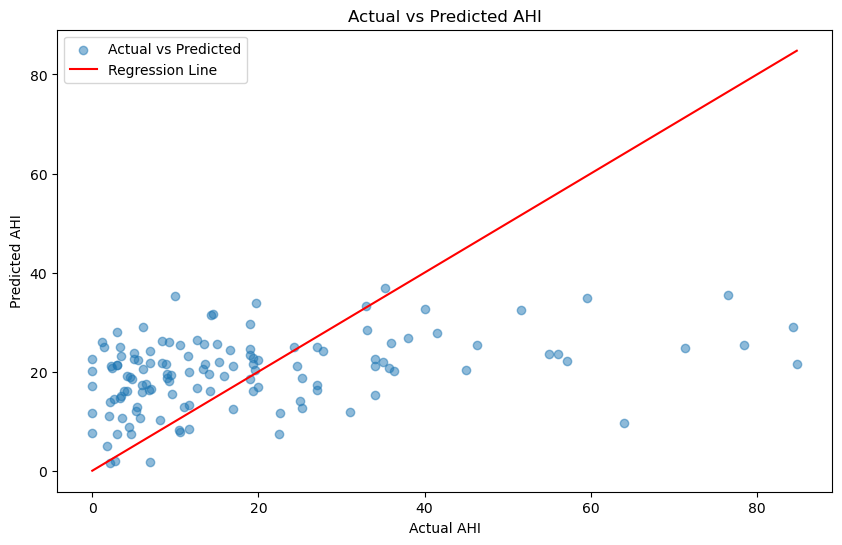

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Actual vs Predicted', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Regression Line')
plt.xlabel('Actual AHI')
plt.ylabel('Predicted AHI')
plt.title('Actual vs Predicted AHI')
plt.legend()
plt.show()

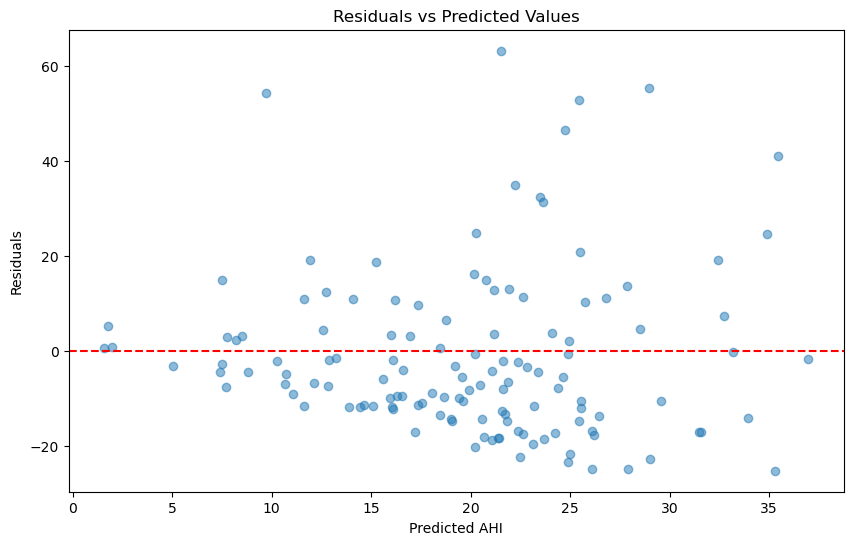

In [41]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals versus the predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted AHI')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

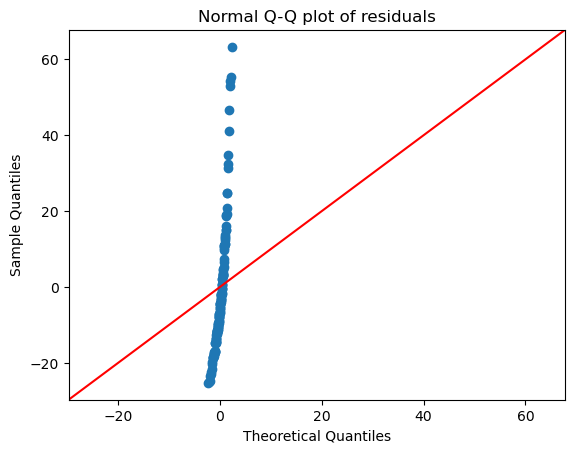

In [42]:
import statsmodels.api as sm

# Calculate the residuals
residuals = y_test - y_pred

# Generate the Q-Q plot
sm.qqplot(residuals, line='45')
plt.title('Normal Q-Q plot of residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [31]:
coefficients = model.coef_

for feature, coef in zip(X.columns, coefficients):
    print(f'{feature}: {coef}')

Gender: 1.4969608181855765
Age: 12.595274095297503
Cervical: 32.44843666085872
BMI: 27.853209973031884


### Try with Ordinary or General Least Squares model 
However: note that the interpretation of R_squared is now different compared to Linear Regression, as R^2 in GLM is not related to a correlation coefficient! 

------------------Results of Ordinary Least Squares Regression------------------
                            OLS Regression Results                            
Dep. Variable:                    AHI   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     38.96
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.68e-28
Time:                        11:19:27   Log-Likelihood:                -2185.6
No. Observations:                 519   AIC:                             4381.
Df Residuals:                     514   BIC:                             4402.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

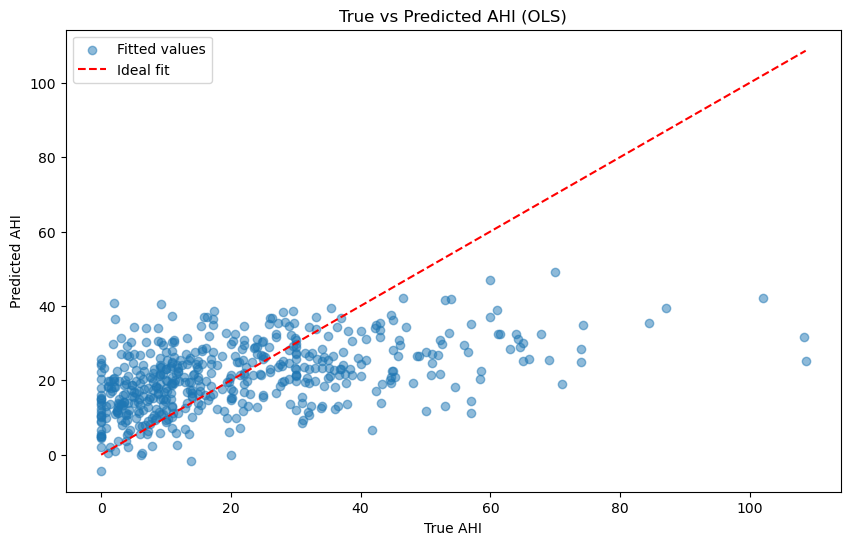

In [32]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Add a constant to the model (intercept)
X_train_val_const = sm.add_constant(X_train_val)

# Fit the model using statsmodels
model_sm = sm.OLS(y_train_val, X_train_val_const).fit()

# Print the summary of the model
print('------------------Results of Ordinary Least Squares Regression------------------')
print(model_sm.summary())

# Plot to compare the true relationship to OLS predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_train_val, model_sm.fittedvalues, alpha=0.5, label='Fitted values')
plt.plot([y_train_val.min(), y_train_val.max()], [y_train_val.min(), y_train_val.max()], 'r--', label='Ideal fit')
plt.xlabel('True AHI')
plt.ylabel('Predicted AHI')
plt.title('True vs Predicted AHI (OLS)')
plt.legend()
plt.show()

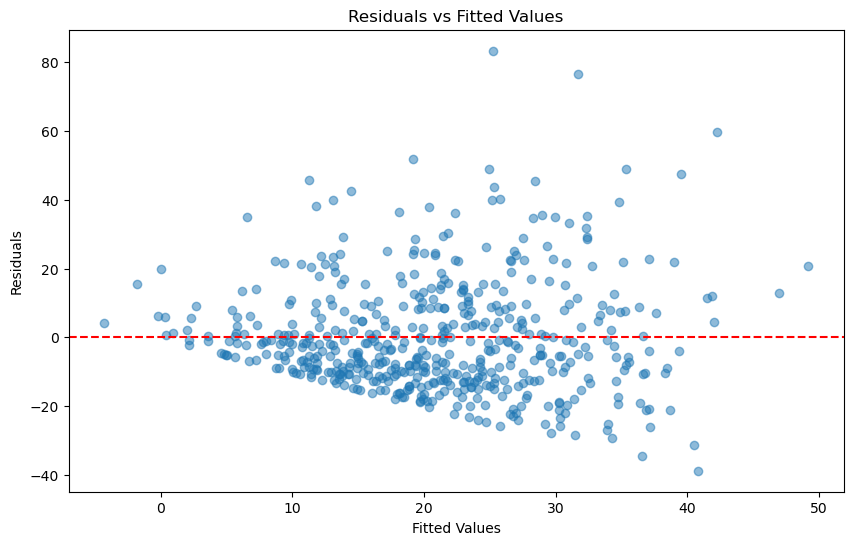

In [33]:
# Calculate the residuals
residuals = y_train_val - model_sm.fittedvalues

# Plot the residuals versus the fitted values
plt.figure(figsize=(10, 6))
plt.scatter(model_sm.fittedvalues, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

------------------Results of Generalized Least Squares Regression------------------
                            GLS Regression Results                            
Dep. Variable:                    AHI   R-squared:                       0.233
Model:                            GLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     38.96
Date:                Mon, 30 Dec 2024   Prob (F-statistic):           1.68e-28
Time:                        11:19:28   Log-Likelihood:                -2185.6
No. Observations:                 519   AIC:                             4381.
Df Residuals:                     514   BIC:                             4402.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

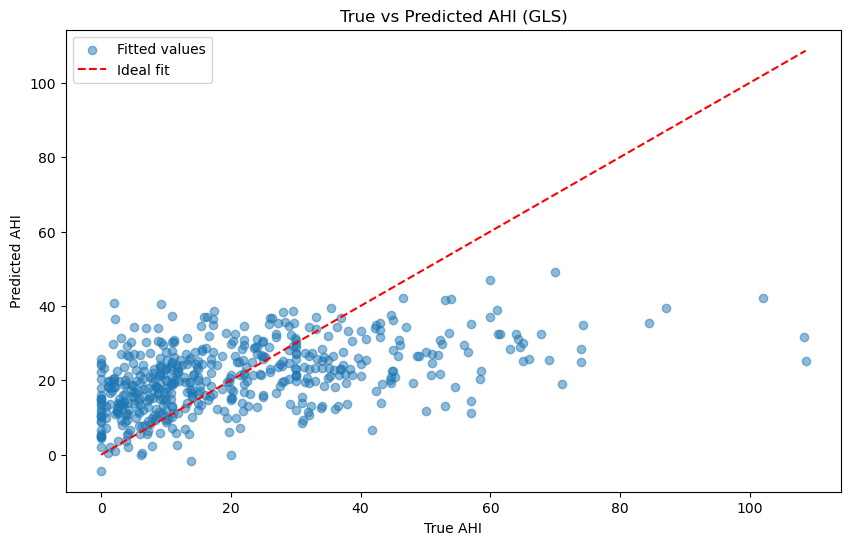

In [34]:
# Fit the model using statsmodels
model_sm = sm.GLS(y_train_val, X_train_val_const).fit()

# Print the summary of the model
print('------------------Results of Generalized Least Squares Regression------------------')
print(model_sm.summary())

# Plot to compare the true relationship to GLS predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_train_val, model_sm.fittedvalues, alpha=0.5, label='Fitted values')
plt.plot([y_train_val.min(), y_train_val.max()], [y_train_val.min(), y_train_val.max()], 'r--', label='Ideal fit')
plt.xlabel('True AHI')
plt.ylabel('Predicted AHI')
plt.title('True vs Predicted AHI (GLS)')
plt.legend()
plt.show()

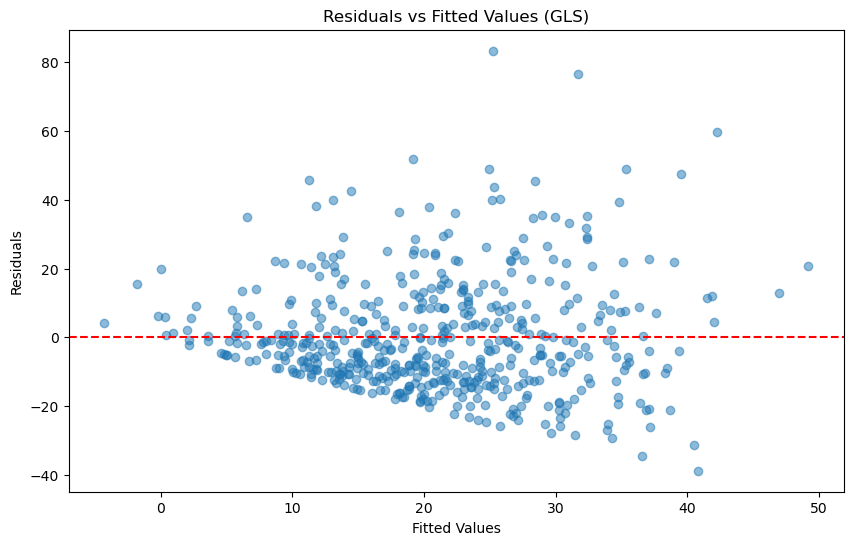

In [35]:
# Calculate the residuals for the GLS model
residuals_gls = y_train_val - model_sm.fittedvalues

# Plot the residuals versus the fitted values for GLS
plt.figure(figsize=(10, 6))
plt.scatter(model_sm.fittedvalues, residuals_gls, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values (GLS)')
plt.show()

### Consider interaction terms 

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate

# Create interaction terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interaction = poly.fit_transform(X)

# Perform Min-Max scaling on the interaction terms
X_interaction_min_max_scaled = min_max_scaler.fit_transform(X_interaction)

# Perform 5-fold cross-validation
cv_results_interaction = cross_validate(LinearRegression(), X_interaction, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])

# Extract and print the results
r2_interaction = cv_results_interaction['test_r2']
mse_interaction = -cv_results_interaction['test_neg_mean_squared_error']
rmse_interaction = -cv_results_interaction['test_neg_root_mean_squared_error']
mae_interaction = -cv_results_interaction['test_neg_mean_absolute_error']

print(f'Cross-Validation R-squared with interaction terms: {r2_interaction.mean()} ({r2_interaction.std()})')
print(f'Cross-Validation Mean Squared Error with interaction terms: {mse_interaction.mean()} ({mse_interaction.std()})')
print(f'Cross-Validation Root Mean Squared Error with interaction terms: {rmse_interaction.mean()} ({rmse_interaction.std()})')
print(f'Cross-Validation Mean Absolute Error with interaction terms: {mae_interaction.mean()} ({mae_interaction.std()})')


Cross-Validation R-squared with interaction terms: 0.20219120126993015 (0.097395557517043)
Cross-Validation Mean Squared Error with interaction terms: 270.1284075950731 (85.37558896652462)
Cross-Validation Root Mean Squared Error with interaction terms: 16.2502574239604 (2.461207274914694)
Cross-Validation Mean Absolute Error with interaction terms: 12.392350152124056 (1.3328032231017841)


### Compare with naive predictor 

In [37]:
# Calculate the mean of the training target variable
mean_train = y_train_val.mean()

# Make predictions using the naive predictor
y_pred_naive = np.full_like(y_test, mean_train, dtype=np.float64)

# Evaluate the naive predictor
mse_naive = mean_squared_error(y_test, y_pred_naive)
r2_naive = r2_score(y_test, y_pred_naive)
rmse_naive = np.sqrt(mse_naive)
mae_naive = np.mean(np.abs(y_test - y_pred_naive))


print(f'Naive Predictor - R-squared: {r2_naive}')
print(f'Naive Predictor - Mean Squared Error: {mse_naive}')
print(f'Naive Predictor - Root Mean Squared Error: {rmse_naive}')
print(f'Naive Predictor - Mean Absolute Error: {mae_naive}')

Naive Predictor - R-squared: -0.015579152913872463
Naive Predictor - Mean Squared Error: 357.6460474126658
Naive Predictor - Root Mean Squared Error: 18.911532127584632
Naive Predictor - Mean Absolute Error: 14.854823477100934


### Influence of gender 

In [38]:
from sklearn.model_selection import cross_val_score

# Filter the dataset based on gender
X_male = X[X['Gender'] == 1]
y_male = y[X['Gender'] == 1]
X_female = X[X['Gender'] == 0]
y_female = y[X['Gender'] == 0]

# Perform cross-validation for males
cv_results_male_r2 = cross_val_score(model, X_male, y_male, cv=5, scoring='r2')
cv_results_male_mse = cross_val_score(model, X_male, y_male, cv=5, scoring='neg_mean_squared_error')
cv_results_male_rmse = cross_val_score(model, X_male, y_male, cv=5, scoring='neg_root_mean_squared_error')
cv_results_male_mae = cross_val_score(model, X_male, y_male, cv=5, scoring='neg_mean_absolute_error')

# Perform cross-validation for females
cv_results_female_r2 = cross_val_score(model, X_female, y_female, cv=5, scoring='r2')
cv_results_female_mse = cross_val_score(model, X_female, y_female, cv=5, scoring='neg_mean_squared_error')
cv_results_female_rmse = cross_val_score(model, X_female, y_female, cv=5, scoring='neg_root_mean_squared_error')
cv_results_female_mae = cross_val_score(model, X_female, y_female, cv=5, scoring='neg_mean_absolute_error')

# Print the results
print('-------------------Male-------------------')
print(f'Male - Cross-Validation R-squared: {cv_results_male_r2.mean()} ({cv_results_male_r2.std()})')
print(f'Male - Cross-Validation Mean Squared Error: {-cv_results_male_mse.mean()} ({cv_results_male_mse.std()})')
print(f'Male - Cross-Validation Root Mean Squared Error: {-cv_results_male_rmse.mean()} ({cv_results_male_rmse.std()})')
print(f'Male - Cross-Validation Mean Absolute Error: {-cv_results_male_mae.mean()} ({cv_results_male_mae.std()})')

print('----------------Female-------------------')
print(f'Female - Cross-Validation R-squared: {cv_results_female_r2.mean()} ({cv_results_female_r2.std()})')
print(f'Female - Cross-Validation Mean Squared Error: {-cv_results_female_mse.mean()} ({cv_results_female_mse.std()})')
print(f'Female - Cross-Validation Root Mean Squared Error: {-cv_results_female_rmse.mean()} ({cv_results_female_rmse.std()})')
print(f'Female - Cross-Validation Mean Absolute Error: {-cv_results_female_mae.mean()} ({cv_results_female_mae.std()})')

-------------------Male-------------------
Male - Cross-Validation R-squared: 0.17087451805872145 (0.07432056127006151)
Male - Cross-Validation Mean Squared Error: 274.8294693721476 (66.2442802451243)
Male - Cross-Validation Root Mean Squared Error: 16.460184573525943 (1.9727628285240553)
Male - Cross-Validation Mean Absolute Error: 12.977219073969101 (1.3309371616693102)
----------------Female-------------------
Female - Cross-Validation R-squared: 0.016321635634858712 (0.24190123024226015)
Female - Cross-Validation Mean Squared Error: 292.2952912017673 (116.60849145592124)
Female - Cross-Validation Root Mean Squared Error: 16.70795575343181 (3.6248456164548797)
Female - Cross-Validation Mean Absolute Error: 11.581231176247268 (1.8147010289491152)


In [50]:
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import levene

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(cv_results_male_r2, cv_results_female_r2)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

if p_value < 0.05:
    print("The difference in R-squared values between male and female is statistically significant.")
else:
    print("The difference in R-squared values between male and female is not statistically significant.")


# Check for normality using Shapiro-Wilk test

shapiro_male = shapiro(cv_results_male_r2)
shapiro_female = shapiro(cv_results_female_r2)

print(f'Shapiro-Wilk Test for Male R-squared values: Statistic={shapiro_male.statistic}, p-value={shapiro_male.pvalue}')
print(f'Shapiro-Wilk Test for Female R-squared values: Statistic={shapiro_female.statistic}, p-value={shapiro_female.pvalue}')

# Check for equal variances using Levene's test

levene_test = levene(cv_results_male_r2, cv_results_female_r2)

print(f'Levene\'s Test for equal variances: Statistic={levene_test.statistic}, p-value={levene_test.pvalue}')

# Interpret the results
if shapiro_male.pvalue > 0.05 and shapiro_female.pvalue > 0.05:
    print("Both groups follow a normal distribution.")
else:
    print("One or both groups do not follow a normal distribution.")

if levene_test.pvalue > 0.05:
    print("The variances are equal.")
else:
    print("The variances are not equal.")

T-statistic: 1.2214685444175721
P-value: 0.2566797096866471
The difference in R-squared values between male and female is not statistically significant.
Shapiro-Wilk Test for Male R-squared values: Statistic=0.8530837893486023, p-value=0.2044641375541687
Shapiro-Wilk Test for Female R-squared values: Statistic=0.9632388353347778, p-value=0.8303375840187073
Levene's Test for equal variances: Statistic=2.24163487331446, p-value=0.17271222347317744
Both groups follow a normal distribution.
The variances are equal.


### Use 5-fold cross-validation 

In [16]:
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Perform cross-validation
print('---------------Method 1-----------------')
cv_results = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-Validation R-squared: {cv_results.mean()} ({cv_results.std()})')

cv_results = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation Mean Squared Error: {-cv_results.mean()} ({cv_results.std()})')

cv_results = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
print(f'Cross-Validation Root Mean Squared Error: {-cv_results.mean()} ({cv_results.std()})')

cv_results = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-Validation Mean Absolute Error: {-cv_results.mean()} ({cv_results.std()})')

print('---------------Method 2-----------------')
# perform predictions using cross-validation
y_pred_cv = cross_val_predict(model, X, y, cv=5)

# Evaluate the model
r2_cv = r2_score(y, y_pred_cv)
mse_cv = mean_squared_error(y, y_pred_cv)
rmse_cv = np.sqrt(mse_cv)
mae_cv = mean_absolute_error(y, y_pred_cv)

print(f'Cross-Validation R-squared: {r2_cv}')
print(f'Cross-Validation Mean Squared Error: {mse_cv}')
print(f'Cross-Validation Root Mean Squared Error: {rmse_cv}')
print(f'Cross-Validation Mean Absolute Error: {mae_cv}')

print('---------------Method 3-----------------')
cv_results = cross_validate(model, X, y, cv=5, scoring=['r2', 'neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error'])

r2_cv = cv_results['test_r2']
mse_cv = -cv_results['test_neg_mean_squared_error']
rmse_cv = -cv_results['test_neg_root_mean_squared_error']
mae_cv = -cv_results['test_neg_mean_absolute_error']

print(f'Cross-Validation R-squared: {r2_cv.mean()} ({r2_cv.std()})')
print(f'Cross-Validation Mean Squared Error: {mse_cv.mean()} ({mse_cv.std()})')
print(f'Cross-Validation Root Mean Squared Error: {rmse_cv.mean()} ({rmse_cv.std()})')
print(f'Cross-Validation Mean Absolute Error: {mae_cv.mean()} ({mae_cv.std()})')


---------------Method 1-----------------
Cross-Validation R-squared: 0.1771383612047384 (0.07109726122295967)
Cross-Validation Mean Squared Error: 281.0254355433459 (91.70575157765151)
Cross-Validation Root Mean Squared Error: 16.555723115858942 (2.63314786032988)
Cross-Validation Mean Absolute Error: 12.64569019603181 (1.3895289199930045)
---------------Method 2-----------------
Cross-Validation R-squared: 0.1947190252456087
Cross-Validation Mean Squared Error: 280.9478667303581
Cross-Validation Root Mean Squared Error: 16.76149953704495
Cross-Validation Mean Absolute Error: 12.644551706627977
---------------Method 3-----------------
Cross-Validation R-squared: 0.1771383612047384 (0.07109726122295967)
Cross-Validation Mean Squared Error: 281.0254355433459 (91.70575157765151)
Cross-Validation Root Mean Squared Error: 16.555723115858942 (2.63314786032988)
Cross-Validation Mean Absolute Error: 12.64569019603181 (1.3895289199930045)


### Nested 5-fold cross-validation 

In [17]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the pipeline with minmax scaling and linear regression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression())
])

# Define the outer cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform nested cross-validation
nested_cv_results_r2 = cross_val_score(pipeline, X, y, cv=outer_cv, scoring='r2')
nested_cv_results_mse = cross_val_score(pipeline, X, y, cv=outer_cv, scoring='neg_mean_squared_error')
nested_cv_results_rmse = cross_val_score(pipeline, X, y, cv=outer_cv, scoring='neg_root_mean_squared_error')
nested_cv_results_mae = cross_val_score(pipeline, X, y, cv=outer_cv, scoring='neg_mean_absolute_error')

# Print the results
print(f'Nested Cross-Validation R-squared: {nested_cv_results_r2.mean()} ({nested_cv_results_r2.std()})')
print(f'Nested Cross-Validation Mean Squared Error: {-nested_cv_results_mse.mean()} ({nested_cv_results_mse.std()})')
print(f'Nested Cross-Validation Root Mean Squared Error: {-nested_cv_results_rmse.mean()} ({nested_cv_results_rmse.std()})')
print(f'Nested Cross-Validation Mean Absolute Error: {-nested_cv_results_mae.mean()} ({nested_cv_results_mae.std()})')


Nested Cross-Validation R-squared: 0.17895194496168257 (0.06901676012688919)
Nested Cross-Validation Mean Squared Error: 278.94545805773646 (21.840972252637844)
Nested Cross-Validation Root Mean Squared Error: 16.688841005011945 (0.6542506913778648)
Nested Cross-Validation Mean Absolute Error: 12.6142302355302 (0.5900988399437678)


# <font color=#BB44>**General function for Nested CV**</font>

In [18]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def Model_Train_Nested_CV(regressor, space):
    # configure the cross-validation procedure
    cv_outer = KFold(n_splits=5, shuffle=True, random_state=42)

    outer_results = []
    for train_ix, test_ix in cv_outer.split(X):
        # split data
        X_train_val, X_test = X.iloc[train_ix, :], X.iloc[test_ix, :]
        y_train_val, y_test = y.iloc[train_ix], y.iloc[test_ix]

        # Verify the split: 80% train+validation, 20% test
        # print(f'Training set size: {X_train_val.shape[0]/X.shape[0]} samples')
        # print(f'Test set size: {X_test.shape[0]/X.shape[0]} samples')
        
        # configure the cross-validation procedure
        cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)
        
        # define the model
        model = Pipeline([
            ('scaler', MinMaxScaler()),
            ('regressor', regressor)
        ])
        
        # define search
        search = GridSearchCV(model, space, scoring='neg_root_mean_squared_error', cv=cv_inner, refit=True)
        
        # execute search
        result = search.fit(X_train_val, y_train_val)

        # get the best performing model fit on the whole training set
        best_model = result.best_estimator_
        
        # evaluate model on the hold out dataset
        yhat_val = best_model.predict(X_test)
        
        # evaluate the model
        r2 = r2_score(y_test, yhat_val)
        MAE = mean_absolute_error(y_test, yhat_val)
        MSE = mean_squared_error(y_test, yhat_val)
        RMSE = np.sqrt(MSE)
        
        # store the result
        outer_results.append({
            'R2': r2,
            'MAE': MAE,
            'MSE': MSE,
            'RMSE': RMSE,
            'configuration': result.best_params_
        })

        # Create a DataFrame to display all results in a table
        results_df = pd.DataFrame(outer_results)

    # Display the table with all results
    display(results_df)

    # Find the dictionary with the lowest RMSE value in outer_results
    best_result = min(outer_results, key=lambda x: x['RMSE'])

    # Create a DataFrame to display the best result in a table
    best_result_df = pd.DataFrame([best_result])

    print('-------------------Best RMSE Result-------------------')
    print(best_result_df['configuration'].values[0])
    display(best_result_df)
    
    return best_result_df
    

## Multiple Linear Regression

In [19]:
# Define the Linear Regression regressor
linear_regressor = LinearRegression()

# Define the hyperparameter space for Linear Regression
linear_space = {
    'regressor__fit_intercept': [True, False]
}

# Perform nested cross-validation with Linear Regression
Model_Linear_Regression = Model_Train_Nested_CV(linear_regressor, linear_space)

,R2,MAE,MSE,RMSE,configuration
0,0.144461,13.142975,301.286437,17.357605,{'regressor__fit_intercept': True}
1,0.236210,12.575687,306.300827,17.501452,{'regressor__fit_intercept': True}
2,0.205288,11.494180,274.051670,16.554506,{'regressor__fit_intercept': True}
3,0.060995,12.869319,249.123904,15.783659,{'regressor__fit_intercept': True}
4,0.247806,12.988989,263.964452,16.246983,{'regressor__fit_intercept': True}


-------------------Best RMSE Result-------------------
{'regressor__fit_intercept': True}


,R2,MAE,MSE,RMSE,configuration
0,0.060995,12.869319,249.123904,15.783659,{'regressor__fit_intercept': True}


## Lasso Linear Regression 

In [20]:
from sklearn.linear_model import Lasso

# Define the Lasso regressor
lasso_regressor = Lasso()

# Define the hyperparameter space for Lasso
lasso_space = {
    'regressor__alpha': [0.005, 0.01, 0.015, 0.02, 0.03]
}

# Perform nested cross-validation with Lasso
Model_Lasso_Linear_Regression = Model_Train_Nested_CV(lasso_regressor, lasso_space)

,R2,MAE,MSE,RMSE,configuration
0,0.142001,13.151209,302.152509,17.382535,{'regressor__alpha': 0.03}
1,0.233622,12.589006,307.338547,17.531074,{'regressor__alpha': 0.02}
2,0.205078,11.494809,274.123888,16.556687,{'regressor__alpha': 0.005}
3,0.063433,12.859710,248.477130,15.763157,{'regressor__alpha': 0.01}
4,0.247881,12.993680,263.938119,16.246172,{'regressor__alpha': 0.005}


-------------------Best RMSE Result-------------------
{'regressor__alpha': 0.01}


,R2,MAE,MSE,RMSE,configuration
0,0.063433,12.85971,248.47713,15.763157,{'regressor__alpha': 0.01}


## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor

# Define the Decision Tree regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter space for Decision Tree
decision_tree_space = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform nested cross-validation with Decision Tree
Model_decision_tree = Model_Train_Nested_CV(decision_tree_regressor, decision_tree_space)

,R2,MAE,MSE,RMSE,configuration
0,0.033623,12.890181,340.319031,18.447738,"{'regressor__max_depth': 10, 'regressor__min_s..."
1,0.011648,14.020901,396.356585,19.908706,"{'regressor__max_depth': 10, 'regressor__min_s..."
2,-0.117218,14.446528,385.266026,19.628195,"{'regressor__max_depth': 10, 'regressor__min_s..."
3,-0.057017,12.918647,280.433066,16.746136,"{'regressor__max_depth': 10, 'regressor__min_s..."
4,-0.268434,16.445326,445.126667,21.098025,"{'regressor__max_depth': 10, 'regressor__min_s..."


-------------------Best RMSE Result-------------------
{'regressor__max_depth': 10, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}


,R2,MAE,MSE,RMSE,configuration
0,-0.057017,12.918647,280.433066,16.746136,"{'regressor__max_depth': 10, 'regressor__min_s..."


## Random forest 

In [23]:
from sklearn.ensemble import RandomForestRegressor

# Define the Random Forest regressor
random_forest_regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameter space for Random Forest
random_forest_space = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform nested cross-validation with Random Forest
Model_Random_Forest = Model_Train_Nested_CV(random_forest_regressor, random_forest_space)

,R2,MAE,MSE,RMSE,configuration
0,0.140870,12.633624,302.551112,17.393996,"{'regressor__max_depth': 10, 'regressor__min_s..."
1,0.165793,12.764193,334.539918,18.290432,"{'regressor__max_depth': 10, 'regressor__min_s..."
2,0.299716,11.354904,241.488837,15.539911,"{'regressor__max_depth': 10, 'regressor__min_s..."
3,0.116861,12.430065,234.302186,15.306933,"{'regressor__max_depth': 10, 'regressor__min_s..."
4,0.150825,13.361609,297.997623,17.262608,"{'regressor__max_depth': 10, 'regressor__min_s..."


-------------------Best RMSE Result-------------------
{'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 300}


,R2,MAE,MSE,RMSE,configuration
0,0.116861,12.430065,234.302186,15.306933,"{'regressor__max_depth': 10, 'regressor__min_s..."


## XGBoost 

In [24]:
from xgboost import XGBRegressor

# Define the XGBoost regressor
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the hyperparameter space for XGBoost
xgb_space = {
    'regressor__n_estimators': [100, 250, 500],
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'regressor__max_depth': [2, 3, 5, 6]
}

# Perform nested cross-validation with XGBoost
Model_XGBoost = Model_Train_Nested_CV(xgb_regressor, xgb_space)

,R2,MAE,MSE,RMSE,configuration
0,0.178642,12.547689,289.249181,17.007327,"{'regressor__learning_rate': 0.01, 'regressor_..."
1,0.242462,12.212155,303.793498,17.429673,"{'regressor__learning_rate': 0.01, 'regressor_..."
2,0.253477,11.334407,257.433910,16.044747,"{'regressor__learning_rate': 0.01, 'regressor_..."
3,0.175948,12.361092,218.625970,14.786006,"{'regressor__learning_rate': 0.01, 'regressor_..."
4,0.210337,13.447862,277.113282,16.646720,"{'regressor__learning_rate': 0.01, 'regressor_..."


-------------------Best RMSE Result-------------------
{'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 250}


,R2,MAE,MSE,RMSE,configuration
0,0.175948,12.361092,218.62597,14.786006,"{'regressor__learning_rate': 0.01, 'regressor_..."


## Support Vector Machine

In [25]:
from sklearn.svm import SVR

# Define the SVM regressor
svm_regressor = SVR()

# Define the hyperparameter space for SVM
svm_space = {
    'regressor__C': [0.1, 1, 10, 100, 1000],
    'regressor__kernel': ['rbf', 'linear'],
    'regressor__gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}

# Perform nested cross-validation with SVM
Model_SVM = Model_Train_Nested_CV(svm_regressor, svm_space)

,R2,MAE,MSE,RMSE,configuration
0,0.089265,12.353341,320.724007,17.908769,"{'regressor__C': 100, 'regressor__gamma': 1, '..."
1,0.095230,12.840882,362.837576,19.048296,"{'regressor__C': 100, 'regressor__gamma': 0.1,..."
2,0.103181,11.757566,309.262712,17.585867,"{'regressor__C': 100, 'regressor__gamma': 1, '..."
3,0.189074,11.372378,215.143549,14.667772,"{'regressor__C': 1000, 'regressor__gamma': 0.1..."
4,0.176431,12.454854,289.011817,17.000348,"{'regressor__C': 1000, 'regressor__gamma': 0.1..."


-------------------Best RMSE Result-------------------
{'regressor__C': 1000, 'regressor__gamma': 0.1, 'regressor__kernel': 'rbf'}


,R2,MAE,MSE,RMSE,configuration
0,0.189074,11.372378,215.143549,14.667772,"{'regressor__C': 1000, 'regressor__gamma': 0.1..."


## Multilayer perceptron 

In [26]:
from sklearn.neural_network import MLPRegressor

# Define the MLP regressor
mlp_regressor = MLPRegressor(max_iter=1000, random_state=42)

# Define the hyperparameter space for MLP
mlp_space = {
    'regressor__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'regressor__activation': ['relu', 'tanh'],
    'regressor__solver': ['adam', 'sgd'],
    'regressor__alpha': [0.0001, 0.001, 0.01]
}

# Perform nested cross-validation with MLP
Model_MLP = Model_Train_Nested_CV(mlp_regressor, mlp_space)

c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pc\anaconda3\envs\ENV_MLLB\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\pc\anaconda3\en

,R2,MAE,MSE,RMSE,configuration
0,0.145464,12.673774,300.932971,17.347420,"{'regressor__activation': 'relu', 'regressor__..."
1,0.258629,12.115229,297.310028,17.242680,"{'regressor__activation': 'relu', 'regressor__..."
2,0.250117,11.477503,258.592691,16.080817,"{'regressor__activation': 'tanh', 'regressor__..."
3,0.098921,12.493395,239.061770,15.461622,"{'regressor__activation': 'relu', 'regressor__..."
4,0.230045,12.922105,270.197490,16.437685,"{'regressor__activation': 'relu', 'regressor__..."


-------------------Best RMSE Result-------------------
{'regressor__activation': 'relu', 'regressor__alpha': 0.0001, 'regressor__hidden_layer_sizes': (50,), 'regressor__solver': 'sgd'}


,R2,MAE,MSE,RMSE,configuration
0,0.098921,12.493395,239.06177,15.461622,"{'regressor__activation': 'relu', 'regressor__..."
